### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

import warnings
warnings.filterwarnings("ignore")

### Read CSV file and make a Pandas Dataframe

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [6]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [7]:
data.head(5)

,Category Name,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales
0,Sporting Goods,1/31/2018 22:56,13.110000,1,327.75
1,Sporting Goods,1/13/2018 12:27,16.389999,1,327.75
2,Sporting Goods,1/13/2018 12:06,18.030001,1,327.75
3,Sporting Goods,1/13/2018 11:45,22.940001,1,327.75
4,Sporting Goods,1/13/2018 11:24,29.500000,1,327.75


### Feature Extraction for working upon on Dataframe

In [8]:
filter = data['Category Name'].isin(['Water Sports'])
#display the filter
filter4 = data[filter]

In [9]:
filter4.shape

(15540, 5)

In [10]:
filter4 = data.loc[filter, ['order date (DateOrders)','Sales','Order Item Discount','Order Item Quantity']]

In [11]:
filter4.head()

,order date (DateOrders),Sales,Order Item Discount,Order Item Quantity
52676,10/2/2017 11:22,199.990005,11.0,1
52677,10/2/2017 6:28,199.990005,14.0,1
52678,10/2/2017 5:25,199.990005,18.0,1
52679,10/2/2017 4:43,199.990005,20.0,1
52680,10/2/2017 3:40,199.990005,24.0,1


### Applying to Pandas DateTime format for easy access

In [12]:
filter4['order date (DateOrders)'] =  filter4['order date (DateOrders)'].apply(pd.to_datetime)
filter4.head()

,order date (DateOrders),Sales,Order Item Discount,Order Item Quantity
52676,2017-10-02 11:22:00,199.990005,11.0,1
52677,2017-10-02 06:28:00,199.990005,14.0,1
52678,2017-10-02 05:25:00,199.990005,18.0,1
52679,2017-10-02 04:43:00,199.990005,20.0,1
52680,2017-10-02 03:40:00,199.990005,24.0,1


### Sorting the records by date and their time

In [13]:
filter4 = filter4.sort_values(by='order date (DateOrders)')
filter4.head(10)

,order date (DateOrders),Sales,Order Item Discount,Order Item Quantity
77011,2015-01-01 00:21:00,199.990005,6.0,1
77010,2015-01-01 02:06:00,199.990005,4.0,1
77009,2015-01-01 02:48:00,199.990005,2.0,1
77008,2015-01-01 02:48:00,199.990005,0.0,1
77007,2015-01-01 03:09:00,199.990005,50.0,1
77006,2015-01-01 03:09:00,199.990005,40.0,1
77005,2015-01-01 04:54:00,199.990005,36.0,1
77004,2015-01-01 05:36:00,199.990005,34.0,1
77003,2015-01-01 05:57:00,199.990005,32.0,1
77001,2015-01-01 08:03:00,199.990005,26.0,1


### Making column of Order date to Index

In [14]:
filter4.set_axis(filter4['order date (DateOrders)'], inplace=True)
filter4.drop(columns=['order date (DateOrders)'],inplace=True)

In [15]:
filter4.head()

,Sales,Order Item Discount,Order Item Quantity
order date (DateOrders),,,
2015-01-01 00:21:00,199.990005,6.0,1
2015-01-01 02:06:00,199.990005,4.0,1
2015-01-01 02:48:00,199.990005,2.0,1
2015-01-01 02:48:00,199.990005,0.0,1
2015-01-01 03:09:00,199.990005,50.0,1


In [16]:
filter4.shape

(15540, 3)

### Day-wise Aggregates

In [17]:
Item_quantity = filter4.groupby([(filter4.index.year), (filter4.index.month), (filter4.index.day)])['Order Item Quantity'].sum().astype(int)
Item_discount = filter4.groupby([(filter4.index.year), (filter4.index.month), (filter4.index.day)])['Order Item Discount'].sum().astype(int)
Item_sales = filter4.groupby([(filter4.index.year), (filter4.index.month), (filter4.index.day)])['Sales'].sum().astype(int)

### Display in single Dataframe

In [18]:
ItemSales=pd.DataFrame(Item_sales)
ItemDiscount=pd.DataFrame(Item_discount)
ItemQuantity=pd.DataFrame(Item_quantity)

In [19]:
total=ItemSales.join(ItemDiscount)

In [20]:
daily_Sales=total.join(ItemQuantity)

In [21]:
daily_Sales.head()

Sales  \
order date (DateOrders) order date (DateOrders) order date (DateOrders)          
2015                    1                       1                         3599   
                                                2                         1799   
                                                3                         2999   
                                                4                         2599   
                                                5                         3399   

                                                                         Order Item Discount  \
order date (DateOrders) order date (DateOrders) order date (DateOrders)                        
2015                    1                       1                                        365   
                                                2                                        204   
                                                3                                        263   
                                                4                                        269   
                                                5                                        359   

                                                                         Order Item Quantity  
order date (DateOrders) order date (DateOrders) order date (DateOrders)                       
2015                    1                       1                                         18  
                                                2                                          9  
                                                3                                         15  
                                                4                                         13  
                                                5                                         17

### Converting index to single column only

In [22]:
y = daily_Sales.index.get_level_values(0)
m = daily_Sales.index.get_level_values(1)
d = daily_Sales.index.get_level_values(2)

In [23]:
daily_Sales['Date'] = pd.to_datetime(y* 10000 + m * 100 + d * 1, format="%Y%m%d")
daily_Sales.set_index('Date', append=True, inplace=True)

daily_Sales=daily_Sales.droplevel(0)
daily_Sales=daily_Sales.droplevel(0)
daily_Sales=daily_Sales.droplevel(0)

In [24]:
daily_Sales.head()

,Sales,Order Item Discount,Order Item Quantity
Date,,,
2015-01-01,3599,365,18
2015-01-02,1799,204,9
2015-01-03,2999,263,15
2015-01-04,2599,269,13
2015-01-05,3399,359,17


In [25]:
Water_Sports_Sold = daily_Sales[["Order Item Quantity"]]
Water_Sports_Sold.tail()

,Order Item Quantity
Date,
2017-09-28,10
2017-09-29,30
2017-09-30,14
2017-10-01,17
2017-10-02,8


In [26]:
Water_Sports_Sold.shape

(1006, 1)

# DATA PREPARATION

### FEATURE ENGINEERING

Considering the prior 90 days sales to predict the number of items sold for the month of April_2015 till Sept_2017

In [27]:
April_2015 = Water_Sports_Sold.iloc[1:90]
May_2015 = Water_Sports_Sold.iloc[31:120]
June_2015 = Water_Sports_Sold.iloc[62:151]
July_2015 = Water_Sports_Sold.iloc[92:181]
August_2015 = Water_Sports_Sold.iloc[123:212]
Sept_2015 = Water_Sports_Sold.iloc[154:243]
Oct_2015 = Water_Sports_Sold.iloc[184:273]
Nov_2015 = Water_Sports_Sold.iloc[215:304]
Dec_2015 = Water_Sports_Sold.iloc[245:334]
Jan_2016 = Water_Sports_Sold.iloc[276:365]
Feb_2016 = Water_Sports_Sold.iloc[307:396]
March_2016 = Water_Sports_Sold.iloc[336:425]
April_2016 = Water_Sports_Sold.iloc[367:456]
May_2016 = Water_Sports_Sold.iloc[397:486]
June_2016 = Water_Sports_Sold.iloc[428:517]
July_2016 = Water_Sports_Sold.iloc[458:547]
August_2016 = Water_Sports_Sold.iloc[489:578]
Sept_2016 = Water_Sports_Sold.iloc[520:609]
Oct_2016 = Water_Sports_Sold.iloc[550:639]
Nov_2016 = Water_Sports_Sold.iloc[581:670]
Dec_2016 = Water_Sports_Sold.iloc[611:700]
Jan_2017 = Water_Sports_Sold.iloc[642:731]
Feb_2017 = Water_Sports_Sold.iloc[673:762]
March_2017 = Water_Sports_Sold.iloc[701:790]
April_2017 = Water_Sports_Sold.iloc[732:821]
May_2017 = Water_Sports_Sold.iloc[762:851]
June_2017 = Water_Sports_Sold.iloc[793:882]
July_2017 = Water_Sports_Sold.iloc[823:912]
August_2017 = Water_Sports_Sold.iloc[854:943]
Sept_2017 = Water_Sports_Sold.iloc[885:974]

In [28]:
Sept_2017.tail()

,Order Item Quantity
Date,
2017-08-27,17
2017-08-28,12
2017-08-29,14
2017-08-30,14
2017-08-31,13


### Taking Transpose to convert 90 days sales as Single row/record for each month to be predicted

In [29]:
Row_1 = pd.DataFrame(April_2015.to_numpy().T).add_prefix('Day')
Row_2 = pd.DataFrame(May_2015.to_numpy().T).add_prefix('Day')
Row_3 = pd.DataFrame(June_2015.to_numpy().T).add_prefix('Day')
Row_4 = pd.DataFrame(July_2015.to_numpy().T).add_prefix('Day')
Row_5 = pd.DataFrame(August_2015.to_numpy().T).add_prefix('Day')
Row_6 = pd.DataFrame(Sept_2015.to_numpy().T).add_prefix('Day')
Row_7 = pd.DataFrame(Oct_2015.to_numpy().T).add_prefix('Day')
Row_8 = pd.DataFrame(Nov_2015.to_numpy().T).add_prefix('Day')
Row_9 = pd.DataFrame(Dec_2015.to_numpy().T).add_prefix('Day')
Row_10 = pd.DataFrame(Jan_2016.to_numpy().T).add_prefix('Day')
Row_11 = pd.DataFrame(Feb_2016.to_numpy().T).add_prefix('Day')
Row_12 = pd.DataFrame(March_2016.to_numpy().T).add_prefix('Day')
Row_13 = pd.DataFrame(April_2016.to_numpy().T).add_prefix('Day')
Row_14 = pd.DataFrame(May_2016.to_numpy().T).add_prefix('Day')
Row_15 = pd.DataFrame(June_2016.to_numpy().T).add_prefix('Day')
Row_16 = pd.DataFrame(July_2016.to_numpy().T).add_prefix('Day')
Row_17 = pd.DataFrame(August_2016.to_numpy().T).add_prefix('Day')
Row_18 = pd.DataFrame(Sept_2016.to_numpy().T).add_prefix('Day')
Row_19 = pd.DataFrame(Oct_2016.to_numpy().T).add_prefix('Day')
Row_20 = pd.DataFrame(Nov_2016.to_numpy().T).add_prefix('Day')
Row_21 = pd.DataFrame(Dec_2016.to_numpy().T).add_prefix('Day')
Row_22 = pd.DataFrame(Jan_2017.to_numpy().T).add_prefix('Day')
Row_23 = pd.DataFrame(Feb_2017.to_numpy().T).add_prefix('Day')
Row_24 = pd.DataFrame(March_2017.to_numpy().T).add_prefix('Day')
Row_25 = pd.DataFrame(April_2017.to_numpy().T).add_prefix('Day')
Row_26 = pd.DataFrame(May_2017.to_numpy().T).add_prefix('Day')
Row_27 = pd.DataFrame(June_2017.to_numpy().T).add_prefix('Day')
Row_28 = pd.DataFrame(July_2017.to_numpy().T).add_prefix('Day')
Row_29 = pd.DataFrame(August_2017.to_numpy().T).add_prefix('Day')
Row_30 = pd.DataFrame(Sept_2017.to_numpy().T).add_prefix('Day')

In [30]:
Row_30

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,16,14,16,10,11,19,13,20,18,17,...,25,13,15,12,19,17,12,14,14,13


### Merging all Rows to prepare the DataFrame

In [31]:
merge2=Row_1.append(Row_2,ignore_index=True)
merge3=merge2.append(Row_3,ignore_index=True)
merge4=merge3.append(Row_4,ignore_index=True)
merge5=merge4.append(Row_5,ignore_index=True)
merge6=merge5.append(Row_6,ignore_index=True)
merge7=merge6.append(Row_7,ignore_index=True)
merge8=merge7.append(Row_8,ignore_index=True)
merge9=merge8.append(Row_9,ignore_index=True)
merge10=merge9.append(Row_10,ignore_index=True)
merge11=merge10.append(Row_11,ignore_index=True)
merge12=merge11.append(Row_12,ignore_index=True)
merge13=merge12.append(Row_13,ignore_index=True)
merge14=merge13.append(Row_14,ignore_index=True)
merge15=merge14.append(Row_15,ignore_index=True)
merge16=merge15.append(Row_16,ignore_index=True)
merge17=merge16.append(Row_17,ignore_index=True)
merge18=merge17.append(Row_18,ignore_index=True)
merge19=merge18.append(Row_19,ignore_index=True)
merge20=merge19.append(Row_20,ignore_index=True)
merge21=merge20.append(Row_21,ignore_index=True)
merge22=merge21.append(Row_22,ignore_index=True)
merge23=merge22.append(Row_23,ignore_index=True)
merge24=merge23.append(Row_24,ignore_index=True)
merge25=merge24.append(Row_25,ignore_index=True)
merge26=merge25.append(Row_26,ignore_index=True)
merge27=merge26.append(Row_27,ignore_index=True)
merge28=merge27.append(Row_28,ignore_index=True)
merge29=merge28.append(Row_29,ignore_index=True)
merge30=merge29.append(Row_30,ignore_index=True)

In [32]:
merge30

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,9,15,13,17,17,20,14,9,18,11,...,9,16,15,16,23,15,14,22,18,10
1,23,20,14,8,15,26,12,24,13,17,...,13,17,12,17,9,17,24,14,16,17
2,15,15,21,16,18,17,14,14,19,16,...,18,15,13,24,17,15,12,16,20,17
3,19,19,17,12,21,20,16,17,18,9,...,19,18,14,21,18,22,16,15,15,11
4,18,15,10,19,12,25,15,15,13,17,...,7,16,15,21,18,14,23,9,16,14
5,12,8,16,14,11,18,15,12,11,15,...,13,16,11,22,17,12,21,19,16,13
6,7,10,16,16,20,16,14,13,20,14,...,16,18,13,14,17,13,14,22,15,12
7,10,15,25,15,6,7,16,15,13,9,...,14,14,19,15,14,19,21,13,16,17
8,16,16,12,15,11,16,16,13,12,6,...,20,14,20,14,13,16,19,12,19,18
9,11,17,17,12,18,23,16,19,12,10,...,13,15,14,18,14,17,16,16,14,12


### Month-wise Aggregated values from April_2015 till Sept_2017

In [33]:
monthlyquantity = daily_Sales.groupby([(daily_Sales.index.year), (daily_Sales.index.month)])['Order Item Quantity'].sum().astype(int)
monthlydiscount = daily_Sales.groupby([(daily_Sales.index.year), (daily_Sales.index.month)])['Order Item Discount'].sum().astype(int)

### Convert into a dataframe

In [34]:
Monthly_Quantity=pd.DataFrame(monthlyquantity)
Monthly_Discount=pd.DataFrame(monthlydiscount)

In [35]:
a = Monthly_Quantity.index.get_level_values(0)
b = Monthly_Quantity.index.get_level_values(1)
c = Monthly_Discount.index.get_level_values(0)
e = Monthly_Discount.index.get_level_values(1)

In [36]:
Monthly_Quantity['Index'] = pd.to_datetime(a* 10000 + b * 100 + 1, format="%Y%m%d")
Monthly_Discount['Index'] = pd.to_datetime(c* 10000 + e * 100 + 1, format="%Y%m%d")

Monthly_Quantity.set_index('Index', append=True, inplace=True)
Monthly_Discount.set_index('Index', append=True, inplace=True)

Monthly_Quantity=Monthly_Quantity.droplevel(0)
Monthly_Quantity=Monthly_Quantity.droplevel(0)
Monthly_Discount=Monthly_Discount.droplevel(0)
Monthly_Discount=Monthly_Discount.droplevel(0)

In [37]:
Monthly_Quantity.tail()

,Order Item Quantity
Index,
2017-06-01,461
2017-07-01,471
2017-08-01,516
2017-09-01,512
2017-10-01,25


In [38]:
Monthly_Quantity.shape

(34, 1)

### Slicing and Selecting monthly Items sold from April_2015 till Sept_2017

In [39]:
MonthlyDiscount = Monthly_Discount.iloc[3:33]
MonthlyQuantity = Monthly_Quantity.iloc[3:33]

In [40]:
MonthlyQuantity.shape

(30, 1)

### List down the values of monthly Item Quantity sold from April_2015 till Sept_2017

In [41]:
MonthlyItemQuantity = MonthlyQuantity['Order Item Quantity'].tolist()
MonthlyItemDiscount = MonthlyDiscount['Order Item Discount'].tolist()
print(MonthlyItemQuantity)
print(MonthlyItemDiscount)

[489, 495, 460, 472, 488, 436, 484, 464, 498, 454, 428, 453, 429, 516, 411, 515, 459, 473, 490, 475, 446, 432, 443, 495, 481, 485, 461, 471, 516, 512]
[9879, 10083, 9266, 9582, 9925, 8872, 9805, 9358, 10118, 9137, 8748, 9137, 8748, 10504, 8315, 10391, 9375, 9577, 9883, 9684, 8983, 8760, 9045, 10011, 9762, 9862, 9353, 9594, 10411, 11029]


### Create copy of the dataset

In [42]:
df1 = merge30.copy()

In [43]:
df1

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,9,15,13,17,17,20,14,9,18,11,...,9,16,15,16,23,15,14,22,18,10
1,23,20,14,8,15,26,12,24,13,17,...,13,17,12,17,9,17,24,14,16,17
2,15,15,21,16,18,17,14,14,19,16,...,18,15,13,24,17,15,12,16,20,17
3,19,19,17,12,21,20,16,17,18,9,...,19,18,14,21,18,22,16,15,15,11
4,18,15,10,19,12,25,15,15,13,17,...,7,16,15,21,18,14,23,9,16,14
5,12,8,16,14,11,18,15,12,11,15,...,13,16,11,22,17,12,21,19,16,13
6,7,10,16,16,20,16,14,13,20,14,...,16,18,13,14,17,13,14,22,15,12
7,10,15,25,15,6,7,16,15,13,9,...,14,14,19,15,14,19,21,13,16,17
8,16,16,12,15,11,16,16,13,12,6,...,20,14,20,14,13,16,19,12,19,18
9,11,17,17,12,18,23,16,19,12,10,...,13,15,14,18,14,17,16,16,14,12


### Adding the Target variable to the dataframe

In [44]:
df1.insert(loc=89, column='Order Item Quantity', value=MonthlyItemQuantity)

In [45]:
df1

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity
0,9,15,13,17,17,20,14,9,18,11,...,16,15,16,23,15,14,22,18,10,489
1,23,20,14,8,15,26,12,24,13,17,...,17,12,17,9,17,24,14,16,17,495
2,15,15,21,16,18,17,14,14,19,16,...,15,13,24,17,15,12,16,20,17,460
3,19,19,17,12,21,20,16,17,18,9,...,18,14,21,18,22,16,15,15,11,472
4,18,15,10,19,12,25,15,15,13,17,...,16,15,21,18,14,23,9,16,14,488
5,12,8,16,14,11,18,15,12,11,15,...,16,11,22,17,12,21,19,16,13,436
6,7,10,16,16,20,16,14,13,20,14,...,18,13,14,17,13,14,22,15,12,484
7,10,15,25,15,6,7,16,15,13,9,...,14,19,15,14,19,21,13,16,17,464
8,16,16,12,15,11,16,16,13,12,6,...,14,20,14,13,16,19,12,19,18,498
9,11,17,17,12,18,23,16,19,12,10,...,15,14,18,14,17,16,16,14,12,454


In [46]:
Y = df1["Order Item Quantity"]
X = df1.drop(columns=["Order Item Quantity"])

# Fitting the Model

## XgBoost Regressor¶
    VARIATION-I [FEATURES : Previous 90 Days Sales]

Previous 89 days Items Sold data is used as features to predict the Items Sold in the next month.

### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df1, test_size=0.2, shuffle=True, random_state=1)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 24
No. of testing examples: 6


In [48]:
x_train, y_train = training_data.drop("Order Item Quantity", axis=1), training_data['Order Item Quantity']
x_test, y_test   = testing_data.drop("Order Item Quantity", axis=1) , testing_data['Order Item Quantity']

In [49]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

[22:19:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [50]:
preds = pd.DataFrame(model.predict(x_test))

### Evaluation Metric

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
print("\tMean absolute error (MAE):", mean_absolute_error(y_test, preds))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(y_test, preds)))

	Mean absolute error (MAE): 38.54645792643229
	Root Mean squared error (RMSE): 42.14932456537742


In [53]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, preds)*100

8.838130161970327

In [54]:
print(y_test)

print(preds)

17    473
21    432
10    428
19    475
14    411
20    446
Name: Order Item Quantity, dtype: int64
            0
0  495.013031
1  450.180786
2  474.787018
3  506.217651
4  479.522186
5  490.558075


## K-fold Cross Validation

In [55]:

#import necessary libraries

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from numpy import mean
from numpy import absolute
from numpy import sqrt

We’ll fit a XGBOOST model to the dataset and perform k-fold cross validation to evaluate the model performance

In [56]:
#define cross-validation method to use

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build xtreme gradient boosting model
xgboost = xgb.XGBRegressor() 

### Model Evaluation

In [57]:
#use k-fold CV to evaluate model
score1 = cross_val_score(xgboost, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
#view mean absolute errors
score1

array([-39.54283651, -45.49856567, -16.78574626, -44.00931803,
       -17.77178955, -30.17411296, -32.69603475, -38.29022217,
       -35.18002319, -36.2582194 ])

In [58]:
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 33.620686848958336


In [59]:
score2 = cross_val_score(xgboost, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 38.67781970967695


##### Calculating Mean Absolute Percentage Error with custom function

In [60]:
from sklearn.metrics import make_scorer

#define custom function which returns single output as metric score
def MAPE(y_true, y_pred): 
    return 1 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#make scorer from custome function
mape_scorer = make_scorer(MAPE)

#cross validation score on model
#reg = LinearRegression()
score3 = cross_val_score(xgboost, X, Y, scoring=mape_scorer, cv=cv)
score3

[22:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([-8.05174979, -9.56836718, -2.59835415, -8.24436063, -2.7214003 ,
       -5.07417082, -5.81925491, -6.51237552, -5.98663455, -7.35041415])

In [61]:
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 6.1927081987511965


In [62]:
predictions = cross_val_predict(xgboost, X,Y, cv=cv)
print(predictions)

[22:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## XgBoost Regressor¶
    VARIATION-II [FEATURES : Previous 90 Days Sales + Monthly Item Discount]

In [63]:
df2 = df1.copy()

In [64]:
df2.insert(loc=90, column='Order Item Discount', value=MonthlyItemDiscount)

In [65]:
df2.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity,Order Item Discount
0,9,15,13,17,17,20,14,9,18,11,...,15,16,23,15,14,22,18,10,489,9879
1,23,20,14,8,15,26,12,24,13,17,...,12,17,9,17,24,14,16,17,495,10083
2,15,15,21,16,18,17,14,14,19,16,...,13,24,17,15,12,16,20,17,460,9266
3,19,19,17,12,21,20,16,17,18,9,...,14,21,18,22,16,15,15,11,472,9582
4,18,15,10,19,12,25,15,15,13,17,...,15,21,18,14,23,9,16,14,488,9925


In [66]:
Y1 = df2["Order Item Quantity"]
X1 = df2.drop(columns=["Order Item Quantity"])

# XGBOOST PREDICTION

In [67]:
training_data, testing_data = train_test_split(df2, test_size=0.2, shuffle=False, random_state=1)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 24
No. of testing examples: 6


In [68]:
x_train, y_train = training_data.drop("Order Item Quantity", axis=1), training_data['Order Item Quantity']
x_test, y_test   = testing_data.drop("Order Item Quantity", axis=1) , testing_data['Order Item Quantity']

In [69]:
xgboost.fit(x_train, y_train)

[22:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [70]:
Row25 = x_test.head(1)
Actual_value2 = y_test.head(1)

In [71]:

xgboost_prediction2 = pd.DataFrame(xgboost.predict(Row25))
print(xgboost_prediction2)
print(Actual_value2)

            0
0  483.214264
24    481
Name: Order Item Quantity, dtype: int64


In [128]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, xgboost_prediction2))

	Mean absolute error (MAE): 2.214263916015625


### Model Fitting

In [72]:
#build xtreme gradient boosting model
xgboost = xgb.XGBRegressor() 

In [73]:
#use k-fold CV to evaluate model
score1 = cross_val_score(xgboost, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 3.82432861328125


In [74]:
score2 = cross_val_score(xgboost, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 5.888134993128438


In [75]:
from sklearn.metrics import make_scorer

#define custom function which returns single output as metric score
def MAPE(y_true, y_pred): 
    return 1 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#make scorer from custome function
mape_scorer = make_scorer(MAPE)

#cross validation score on model
#reg = LinearRegression()
score3 = cross_val_score(xgboost, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [76]:
predictions = cross_val_predict(xgboost, X1,Y1, cv=cv)
print(predictions)


[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Linear Regression
    Variation-I [FEATURES : Previous 90 Days Sales]

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
#build linear regression model
linear = LinearRegression()

In [79]:
#use k-fold CV to evaluate model
score1 = cross_val_score(linear, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)


In [80]:

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 32.004900022947254


In [81]:
score2 = cross_val_score(linear, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 36.3362944599298


In [82]:
score3 = cross_val_score(linear, X, Y, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 5.849761822394099


In [83]:
predictions = cross_val_predict(linear, X, Y, cv=cv)
print(predictions)

[457.69135091 508.67555068 436.20131412 507.75726214 441.69835607
 491.82232927 448.80778502 475.31132069 449.11247632 430.18032789
 466.65680643 474.8662455  472.46012809 480.19742809 476.74734
 454.55901555 469.94284262 464.56531787 465.00092027 482.70597963
 490.99493747 494.05414456 452.68120225 473.04821032 509.10179309
 468.26730975 489.30117131 462.82934026 468.76782651 463.0050741 ]


## Linear Regression
    Variation-II [[FEATURES : Previous 90 Days Sales + Monthly Item Discount]

In [84]:
#build linear regression model
linear = LinearRegression()

In [85]:
#use k-fold CV to evaluate model
score1 = cross_val_score(linear, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 4.359381026763892


In [86]:
score2 = cross_val_score(linear, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 7.146018908335518


In [87]:
score3 = cross_val_score(linear, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 0.38430091113920944


In [88]:
predictions = cross_val_predict(linear, X1,Y1, cv=cv)
print(predictions)


[487.03573296 493.27697315 454.93676941 471.4486875  487.60859391
 441.88070192 483.86972217 461.0049381  494.45975503 446.35976758
 431.49201537 450.45052836 434.19618702 515.40380619 419.60787028
 512.81569223 462.38986439 469.17705813 487.68856279 478.45381476
 446.69342078 433.88847739 445.83257742 484.08056845 477.11280634
 486.99830468 461.86449591 476.18863598 510.76853742 543.79356464]


# LINEAR REGESSION PREDICTION

In [129]:
linear.fit(x_train, y_train)

LinearRegression()

In [130]:
linear_prediction2 = pd.DataFrame(linear.predict(Row25))
print(linear_prediction2)
print(Actual_value2)

            0
0  482.793155
24    481
Name: Order Item Quantity, dtype: int64


In [131]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, linear_prediction2))

	Mean absolute error (MAE): 1.7931550473034576


## Random Forest Regressor
    Variation-I [FEATURES : Previous 90 Days Sales]

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

In [91]:
#use k-fold CV to evaluate model
score1 = cross_val_score(regressor, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 25.52833333333333


In [92]:
score2 = cross_val_score(regressor, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 31.455143034698366


In [93]:
score3 = cross_val_score(regressor, X, Y, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 4.442519195639983


## Random Forest Regressor
        Variation-II [FEATURES : Previous 90 Days Sales + Monthly Item Discount ]

In [94]:
#use k-fold CV to evaluate model
score1 = cross_val_score(regressor, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 8.24233333333333


In [95]:
score2 = cross_val_score(regressor, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 10.733350672863837


In [96]:
score3 = cross_val_score(regressor, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 0.9233123590706839


In [97]:
predictions = cross_val_predict(regressor, X1,Y1, cv=cv)
print(predictions)


[489.01 493.21 455.11 477.46 489.86 444.09 486.4  453.56 491.8  445.78
 437.24 447.46 442.45 494.03 440.84 495.42 455.42 471.89 487.   481.98
 441.4  441.91 444.37 496.25 488.89 490.4  453.47 483.02 500.35 494.  ]


# RANDOM FOREST PREDICTION

In [132]:
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [133]:
Forest_prediction2 = pd.DataFrame(regressor.predict(Row25))
print(Forest_prediction2)
print(Actual_value2)

        0
0  486.18
24    481
Name: Order Item Quantity, dtype: int64


In [134]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, Forest_prediction2))

	Mean absolute error (MAE): 5.180000000000007


##ARIMA IMPLEMENTATION

In [98]:
Monthly_Quantity.drop(Monthly_Quantity.tail(1).index,inplace=True)

In [99]:
Monthly_Quantity.shape

(33, 1)

###Plotting the Rolling Mean and STD of the data to see if it is stationary 

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

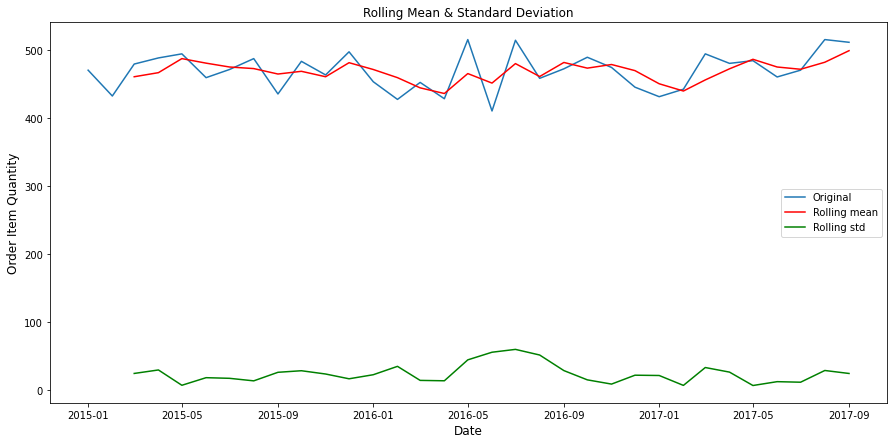

In [100]:
plt.figure(figsize=(15,7))
plt.plot(Monthly_Quantity["Order Item Quantity"], label='Original')
plt.plot(Monthly_Quantity["Order Item Quantity"].rolling(window=3).mean(), color='red', label='Rolling mean')
plt.plot(Monthly_Quantity["Order Item Quantity"].rolling(window=3).std(), color='green', label='Rolling std')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Item Quantity', fontsize=12)
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [101]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

###TEST for checking the stationarity of Data 

Since the p-value is less than 0.05, it means data is stationary

In [102]:
adf_test = adfuller(Monthly_Quantity)
print(f'p-value: {adf_test[1]}')

p-value: 4.624861306506024e-08


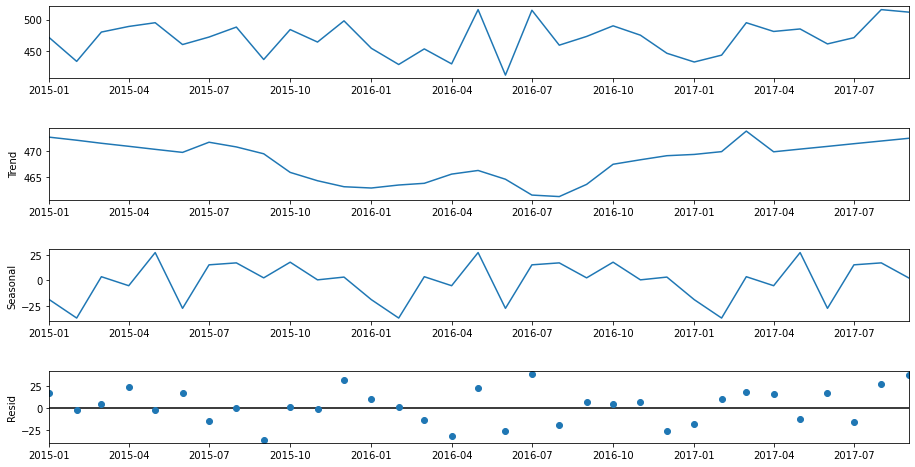

In [103]:

def seasonal_decompose (Monthly_Quantity):
    decomposition = sm.tsa.seasonal_decompose(Monthly_Quantity, model='additive', extrapolate_trend=12)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()
    
    return trend, seasonal, residual
 
trend, seasonal, residual = seasonal_decompose(Monthly_Quantity)

Text(0.5, 1.0, 'Daily_Sales')

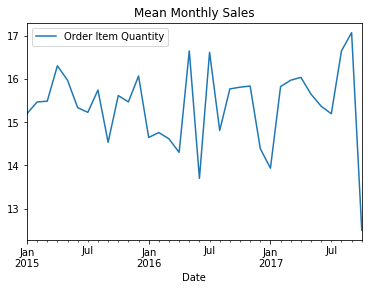

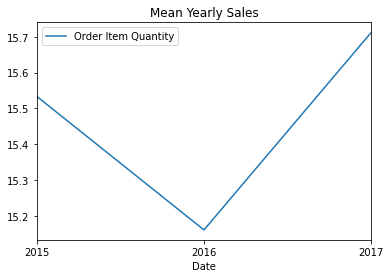

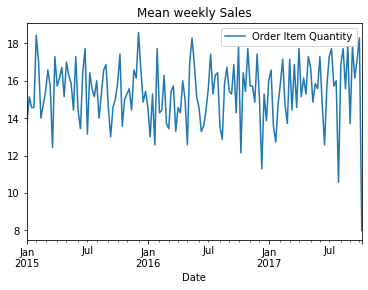

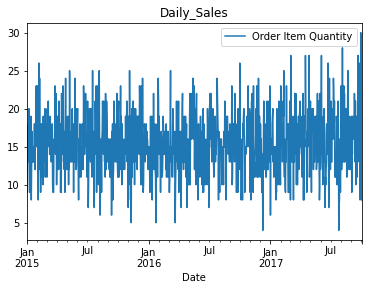

In [104]:
sales_agg_monthly = Water_Sports_Sold.resample("M")[["Order Item Quantity"]].mean()
sales_agg_monthly.plot()
plt.title('Mean Monthly Sales')

sales_agg_yearly = Water_Sports_Sold.resample("Y")[["Order Item Quantity"]].mean()
sales_agg_yearly.plot()
plt.title('Mean Yearly Sales')

sales_agg_weekly = Water_Sports_Sold.resample("W")[["Order Item Quantity"]].mean()
sales_agg_weekly.plot()
plt.title('Mean weekly Sales')

sales_agg_daily = Water_Sports_Sold.resample("D")[["Order Item Quantity"]].mean()
sales_agg_daily.plot()
plt.title('Daily_Sales')

In [105]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 67.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [106]:
from pmdarima import auto_arima

In [107]:
Monthly_Discount.drop(Monthly_Discount.tail(1).index,inplace=True)

In [108]:
Monthly_Discount.shape

(33, 1)

In [109]:
Exog = Monthly_Discount[['Order Item Discount']].to_numpy()
print(Exog)

[[ 9502]
 [ 8760]
 [ 9825]
 [ 9879]
 [10083]
 [ 9266]
 [ 9582]
 [ 9925]
 [ 8872]
 [ 9805]
 [ 9358]
 [10118]
 [ 9137]
 [ 8748]
 [ 9137]
 [ 8748]
 [10504]
 [ 8315]
 [10391]
 [ 9375]
 [ 9577]
 [ 9883]
 [ 9684]
 [ 8983]
 [ 8760]
 [ 9045]
 [10011]
 [ 9762]
 [ 9862]
 [ 9353]
 [ 9594]
 [10411]
 [11029]]


In [110]:


# Split the data into training and test sets
train_data = Monthly_Quantity[:int(0.8*len(Monthly_Quantity))]
test_data = Monthly_Quantity[int(0.8*len(Monthly_Quantity)):]

# Create an auto_arima model
model = auto_arima(train_data, start_p=1, start_q=1,
                   max_p=5, max_q=3, m=1, d=None, 
                    trace=True,
                   error_action='ignore',  # don't want to know if an order does not work
                   suppress_warnings=True,  # don't want convergence warnings
                   stepwise=True)  # set to stepwise






Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=250.541, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=249.721, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=249.129, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=249.730, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=395.277, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=250.287, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=252.161, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.530 seconds


In [111]:
# Fit the model to the training data
model.fit(train_data)

# Make predictions on the test data
predictions = model.predict(n_periods=len(test_data))


In [112]:
predictions

2017-03-01    472.406103
2017-04-01    463.075567
2017-05-01    466.036139
2017-06-01    465.096752
2017-07-01    465.394819
2017-08-01    465.300243
2017-09-01    465.330252
Freq: MS, dtype: float64

In [113]:
#predictions.plot(legend=True)
#test_data['Order Item Quantity'].plot(legend=True)

###Evaluate the model's performance

In [114]:
MAE = (mean_absolute_error(predictions,test_data))
print("MAE:", MAE)

MAE: 23.79337561230958


In [115]:
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f' Root Mean Squared Error: {rmse:.3f}')

 Root Mean Squared Error: 29.248


In [116]:
MAPE = (mean_absolute_percentage_error(test_data, predictions))*100
print("MAPE:", MAPE)


MAPE: 4.74577670884914


# ARIMA PREDICTION

In [135]:
Arima_prediction2 = predictions.iloc[1:2]
Arima_prediction2 = Arima_prediction2.tolist()
print(Arima_prediction2)
print(Actual_value2)

[463.0755674452256]
24    481
Name: Order Item Quantity, dtype: int64


In [136]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, Arima_prediction2))

	Mean absolute error (MAE): 17.9244325547744


##Exponential Smoothing

In [117]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [118]:
def simple_exponential_smoothing(MonthlyItemQuantity, alpha):
    """
    Perform simple exponential smoothing.
    Args:
        series: input series
        alpha: smoothing factor (between 0 and 1)
    Returns:
        smoothed series
    """
    # Initialize the smoothed series with the first value of the input series
    smoothed_series = [MonthlyItemQuantity[0]]
    # Loop through the rest of the series
    for t in range(1, len(MonthlyItemQuantity)):
        # Calculate the smoothed value for time t
        smoothed_series.append(alpha * MonthlyItemQuantity[t] + (1 - alpha) * smoothed_series[t-1])
    return smoothed_series


In [119]:
alpha = 0.7

smoothed_series = simple_exponential_smoothing(MonthlyItemQuantity, alpha)
print(smoothed_series)

[489, 493.20000000000005, 469.96000000000004, 471.38800000000003, 483.0164, 450.10492, 473.83147599999995, 466.94944279999993, 488.68483283999996, 464.40544985199995, 438.9216349556, 448.77649048668, 434.932947146004, 491.6798841438012, 435.2039652431404, 491.0611895729421, 468.6183568718826, 471.68550706156475, 484.50565211846947, 477.85169563554086, 455.55550869066224, 439.06665260719865, 441.8199957821596, 479.0459987346479, 480.4137996203944, 483.6241398861183, 467.7872419658355, 470.03617258975066, 502.2108517769252, 509.06325553307755]


In [120]:
errors = []
for a, f in zip(MonthlyItemQuantity, smoothed_series):
    errors.append(a - f)

# Calculate the MSE
mse = np.sum(np.square(errors)) / len(errors)

# Calculate the RMSE
rmse = np.sqrt(mse)

print("Errors:", errors)
print("RMSE:", rmse)

MAE = (mean_absolute_error(smoothed_series,MonthlyItemQuantity))
print("MAE:", MAE)

MAPE = (mean_absolute_percentage_error(smoothed_series, MonthlyItemQuantity))*100
print("MAPE:", MAPE)




Errors: [0, 1.7999999999999545, -9.960000000000036, 0.6119999999999663, 4.983600000000024, -14.104919999999993, 10.168524000000048, -2.949442799999929, 9.315167160000044, -10.405449851999947, -10.921634955599984, 4.223509513319982, -5.932947146003983, 24.32011585619881, -24.203965243140374, 23.938810427057888, -9.618356871882611, 1.3144929384352508, 5.49434788153053, -2.851695635540864, -9.555508690662236, -7.066652607198648, 1.1800042178404055, 15.954001265352076, 0.5862003796056001, 1.3758601138816857, -6.787241965835506, 0.9638274102493369, 13.78914822307479, 2.9367444669224483]
RMSE: 10.54222862683991
MAE: 7.910472320711098
MAPE: 1.687726268382579


# Exponential Smoothing PREDICTION

In [137]:
Monthly_Quantity.shape


(33, 1)

In [138]:
train_data = Monthly_Quantity[:int(0.8*len(Monthly_Quantity))]
test_data = Monthly_Quantity[int(0.8*len(Monthly_Quantity)):]

In [139]:
alpha = 0.7

In [140]:
model = SimpleExpSmoothing(train_data['Order Item Quantity'])
fit = model.fit(smoothing_level=alpha)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  # If an index is available, see if it is a date-based index or if it


In [141]:
ES_predictions2 = fit.predict(start=test_data.index[0], end=test_data.index[-1])

In [142]:
ES_prediction2 = ES_predictions2.iloc[1:2]
ES_prediction2 = ES_prediction2.tolist()
ES_prediction2

[441.8199957821409]

In [143]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, ES_prediction2))

	Mean absolute error (MAE): 39.18000421785911


# COMBINING PREDICTION OF THE 5 MODELS

In [144]:
df_vertical = pd.concat([xgboost_prediction2, linear_prediction2, Forest_prediction2])

In [145]:
array = df_vertical.values
array

array([[483.21426392],
       [482.79315505],
       [486.18      ]])

In [146]:
array = np.append(array, Arima_prediction2)
print(array)

[483.21426392 482.79315505 486.18       463.07556745]


# INPUT FOR Multilayer perceptron

In [147]:
input_array = np.append(array, ES_prediction2)
print(input_array)

[483.21426392 482.79315505 486.18       463.07556745 441.81999578]


In [149]:
Actual_value2

24    481
Name: Order Item Quantity, dtype: int64

# FINAL OUTPUT

Implement multilayer perceptron to get the final forecast for Water Sports

In [151]:
input = input_array

In [241]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        self.input_size = input_size
        self.hidden_size_1 = hidden_size_1
        self.hidden_size_2 = hidden_size_2
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden_1 = np.random.randn(self.input_size, self.hidden_size_1)
        self.biases_input_hidden_1 = np.zeros(self.hidden_size_1)
        self.weights_hidden_1_hidden_2 = np.random.randn(self.hidden_size_1, self.hidden_size_2)
        self.biases_hidden_1_hidden_2 = np.zeros(self.hidden_size_2)
        self.weights_hidden_2_output = np.random.randn(self.hidden_size_2, self.output_size)
        self.biases_hidden_2_output = np.zeros(self.output_size)

    def forward(self, input):
        # Propagate input through the network
        self.hidden_1 = np.dot(input, self.weights_input_hidden_1) + self.biases_input_hidden_1
        self.hidden_2 = np.dot(self.hidden_1, self.weights_hidden_1_hidden_2) + self.biases_hidden_1_hidden_2
        self.output = np.dot(self.hidden_2, self.weights_hidden_2_output) + self.biases_hidden_2_output
        return self.output

# Create an MLP with 5 inputs,


# Create an MLP with 5 inputs, 2 hidden layers, and 1 output
mlp = MLP(5, 4, 3, 1)

# Propagate some input through the network and print the output
input = input_array
output = mlp.forward(input)
print(output)



[481.48185349]


# Calculate Error for final Output

In [242]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, output))

	Mean absolute error (MAE): 0.48185349173996883
